In [1]:
import json
import numpy as np

In [2]:
with open("intent_value_random_sample_100_games.json", "r") as f:
    data = json.load(f)

In [9]:
whole_countries = []
for value in data:
    keys = []
    for vkey in value.keys():
        keys.append(vkey)
        keys = keys[-2:]
    whole_countries.append(keys)
upper_whole_countries = []
for countries in whole_countries:
    upper_whole_countries.append([country.upper() for country in countries])

In [34]:
country_index = 0
c1_predict_c1 = []
c1_predict_c2 = []
c2_predict_c1 = []
c2_predict_c2 = []
c1_units = []
c2_units = []
for i in range(len(data)):
    c1_predict_c1.append(data[i][whole_countries[i][0]][upper_whole_countries[i][0]][1])
    c1_predict_c2.append(data[i][whole_countries[i][0]][upper_whole_countries[i][1]][1])
    if data[i][f"{whole_countries[i][0]}_units"] != None:
        c1_units.append(len(data[i][f"{whole_countries[i][0]}_units"].split(",")))
    else:
        c1_units.append(0)
    if data[i][f"{whole_countries[i][1]}_units"] != None:
        c2_units.append(len(data[i][f"{whole_countries[i][1]}_units"].split(",")))
    else:
        c2_units.append(0)
    c2_predict_c1.append(data[i][whole_countries[i][1]][upper_whole_countries[i][1]][1])
    c2_predict_c2.append(data[i][whole_countries[i][1]][upper_whole_countries[i][1]][1])

In [6]:
len(data[0]['Italy_units'].split(','))

4

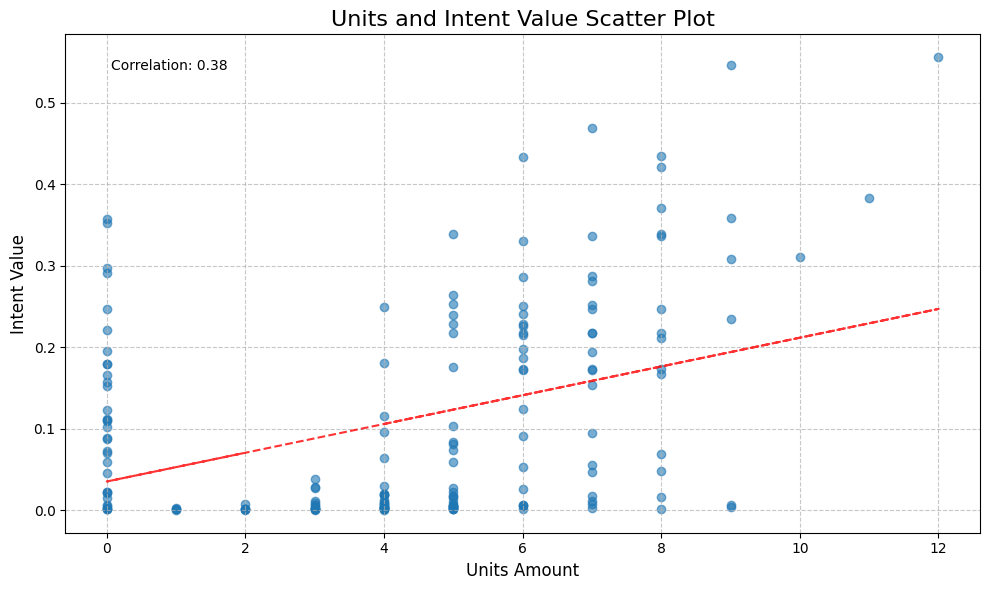

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.interpolate import make_interp_spline

def plot_enhanced_scatter(x, y, title="Enhanced Scatter Plot", xlabel="X-axis", ylabel="Y-axis"):
    # 设置样式
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # 创建图形和轴对象
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 绘制散点图
    sns.scatterplot(x=x, y=y, ax=ax, s=100, alpha=0.7)
    
    # 添加标题和轴标签
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    # 计算并显示相关系数
    correlation, _ = pearsonr(x, y)
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
    
    # 添加非线性趋势线
    x_smooth = np.linspace(min(x), max(x), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    ax.plot(x_smooth, y_smooth, color='red', linestyle='--', linewidth=2, alpha=0.8)
    
    # 调整布局和样式
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    
    # 显示图表
    plt.show()

plot_scatter(c1_units, c1_predict_c1, title="Units and Intent Value Scatter Plot", xlabel="Units Amount", ylabel="Intent Value")

In [33]:
c1_units

[26,
 40,
 33,
 33,
 0,
 5,
 26,
 5,
 0,
 33,
 0,
 26,
 19,
 47,
 82,
 26,
 33,
 26,
 40,
 54,
 19,
 26,
 50,
 50,
 26,
 19,
 0,
 40,
 26,
 0,
 47,
 0,
 33,
 26,
 33,
 40,
 12,
 0,
 26,
 64,
 26,
 33,
 0,
 33,
 57,
 54,
 33,
 33,
 54,
 26,
 26,
 33,
 33,
 47,
 33,
 19,
 0,
 40,
 40,
 12,
 19,
 61,
 54,
 26,
 47,
 47,
 0,
 26,
 61,
 47,
 0,
 33,
 26,
 0,
 19,
 40,
 47,
 0,
 12,
 0,
 5,
 36,
 54,
 12,
 19,
 57,
 33,
 26,
 0,
 0,
 26,
 40,
 47,
 19,
 0,
 0,
 33,
 0,
 26,
 19,
 40,
 33,
 40,
 0,
 36,
 0,
 47,
 54,
 50,
 57,
 64,
 57,
 33,
 33,
 40,
 0,
 0,
 33,
 26,
 33,
 54,
 33,
 47,
 0,
 47,
 40,
 47,
 33,
 33,
 40,
 19,
 19,
 26,
 0,
 26,
 75,
 40,
 0,
 19,
 54,
 26,
 0,
 0,
 47,
 0,
 0,
 43,
 57,
 68,
 26,
 19,
 0,
 40,
 0,
 40,
 40,
 26,
 47,
 5,
 47,
 40,
 26,
 40,
 33,
 19,
 40,
 33,
 54,
 61,
 12,
 0,
 33,
 61,
 47,
 12]

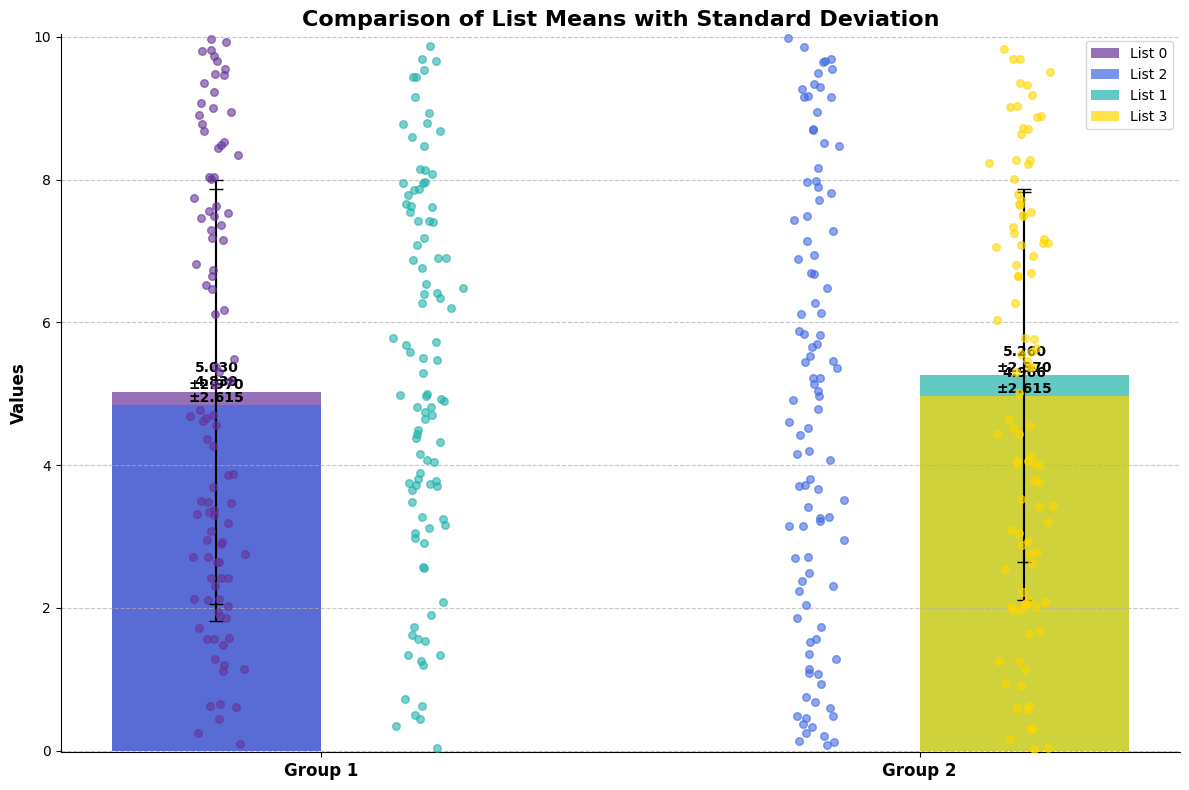

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these are your four lists (replace with actual data)
lists = [c1_predict_c1, c2_predict_c1, c1_predict_c2, c2_predict_c2]
means = [np.mean(lst) for lst in lists]
errors = [np.std(lst) for lst in lists]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Set bar positions
x = np.arange(2)
width = 0.35

# Colors
colors = ['#663399', '#20B2AA', '#4169E1', '#FFD700']

# Plot bars
bars1 = ax.bar(x[0] - width/2, [means[0], means[2]], width, yerr=[errors[0], errors[2]], 
               capsize=5, color=[colors[0], colors[2]], label=['List 0', 'List 2'], alpha=0.7)
bars2 = ax.bar(x[1] + width/2, [means[1], means[3]], width, yerr=[errors[1], errors[3]], 
               capsize=5, color=[colors[1], colors[3]], label=['List 1', 'List 3'], alpha=0.7)

# Function to add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}\n±{errors[list(bars).index(bar)]:.3f}',
                ha='center', va='bottom', fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)

# Add scatter plots
for i, lst in enumerate(lists):
    x_scatter = np.random.normal(x[i//2] + (0.5 if i % 2 else -0.5) * width, 0.02, len(lst))
    ax.scatter(x_scatter, lst, color=colors[i], alpha=0.6, s=30, zorder=3)

# Customize the chart
ax.set_ylabel('Values', fontsize=12, fontweight='bold')
ax.set_title('Comparison of List Means with Standard Deviation', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Group 1', 'Group 2'], fontsize=12, fontweight='bold')
ax.legend(fontsize=10)

# Set y-axis range
ymin = min(min(lst) for lst in lists) - 0.05
ymax = max(max(lst) for lst in lists) + 0.05
ax.set_ylim(ymin, ymax)

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

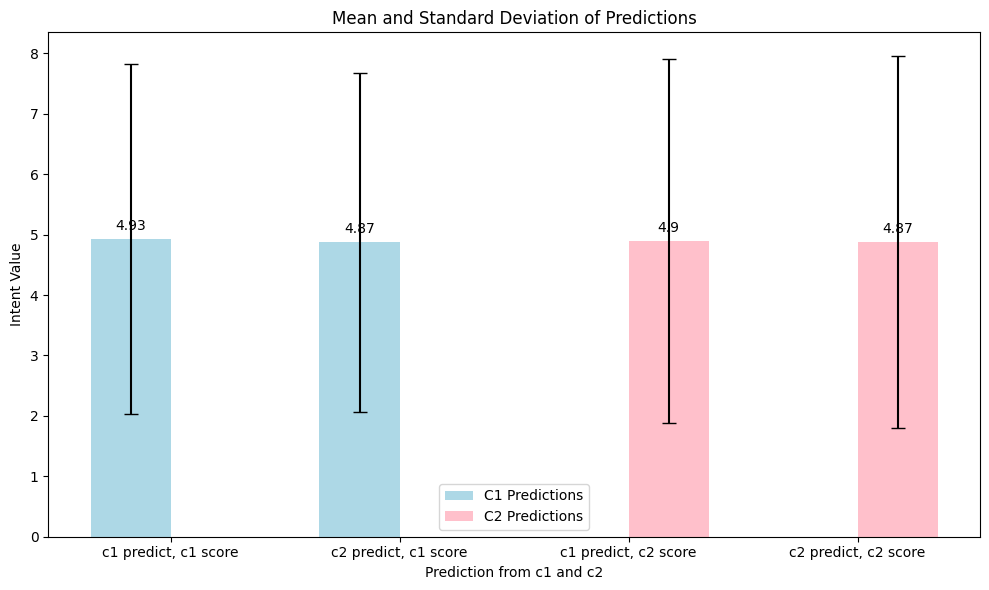

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for the lists
c1_predict_c1 = np.random.rand(100) * 10
c2_predict_c1 = np.random.rand(100) * 10
c1_predict_c2 = np.random.rand(100) * 10
c2_predict_c2 = np.random.rand(100) * 10

# Calculating means and standard deviations
mean_c1_predict_c1 = np.mean(c1_predict_c1)
std_c1_predict_c1 = np.std(c1_predict_c1)

mean_c2_predict_c1 = np.mean(c2_predict_c1)
std_c2_predict_c1 = np.std(c2_predict_c1)

mean_c1_predict_c2 = np.mean(c1_predict_c2)
std_c1_predict_c2 = np.std(c1_predict_c2)

mean_c2_predict_c2 = np.mean(c2_predict_c2)
std_c2_predict_c2 = np.std(c2_predict_c2)

means = [mean_c1_predict_c1, mean_c2_predict_c1, mean_c1_predict_c2, mean_c2_predict_c2]
stds = [std_c1_predict_c1, std_c2_predict_c1, std_c1_predict_c2, std_c2_predict_c2]

labels = ['c1 predict, c1 score', 'c2 predict, c1 score', 'c1 predict, c2 score', 'c2 predict, c2 score']
x = np.arange(len(labels))

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35

bars1 = ax.bar(x[:2] - bar_width/2, means[:2], bar_width, yerr=stds[:2], label='C1 Predictions', capsize=5, color='lightblue')
bars2 = ax.bar(x[2:] + bar_width/2, means[2:], bar_width, yerr=stds[2:], label='C2 Predictions', capsize=5, color='pink')

# Adding mean and std values on top of bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

ax.set_xlabel('Prediction from c1 and c2')
ax.set_ylabel('Intent Value')
ax.set_title('Mean and Standard Deviation of Predictions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
